<a href="https://colab.research.google.com/github/simranbhurat/DM2-Project/blob/master/eda/DMC_EDA_Categories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone -l -s https://github.com/simranbhurat/DM2-Project.git 

fatal: destination path 'DM2-Project' already exists and is not an empty directory.


In [2]:
import pandas as pd


print('Orders Dataframe: \n')
orders = pd.read_csv('DM2-Project/src/data/orders.csv', sep='|')
print(orders.info(), '\n')
orders.head()

Orders Dataframe: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071538 entries, 0 to 1071537
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   date    1071538 non-null  object
 1   userID  1071538 non-null  int64 
 2   itemID  1071538 non-null  int64 
 3   order   1071538 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 32.7+ MB
None 



,date,userID,itemID,order
0,2020-06-01,38769,3477,1
1,2020-06-01,42535,30474,1
2,2020-06-01,42535,15833,1
3,2020-06-01,42535,20131,1
4,2020-06-01,42535,4325,1


In [3]:
print('Items Dataframe: \n')
items = pd.read_csv('DM2-Project/src/data/items.csv', sep='|')
print(items.info(), '\n')
print(items.describe(), '\n')
items.head()

Items Dataframe: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32776 entries, 0 to 32775
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   itemID      32776 non-null  int64 
 1   brand       32776 non-null  int64 
 2   feature_1   32776 non-null  int64 
 3   feature_2   32776 non-null  int64 
 4   feature_3   32776 non-null  int64 
 5   feature_4   32776 non-null  int64 
 6   feature_5   32776 non-null  int64 
 7   categories  25988 non-null  object
dtypes: int64(7), object(1)
memory usage: 2.0+ MB
None 

             itemID         brand     feature_1     feature_2     feature_3  \
count  32776.000000  32776.000000  32776.000000  32776.000000  32776.000000   
mean   16387.500000    702.776574      6.451062      0.817946    440.280388   
std     9461.760548    432.774074      2.744884      0.778284    132.566994   
min        0.000000     -1.000000     -1.000000      0.000000     -1.000000   
25%     8193.750000  

,itemID,brand,feature_1,feature_2,feature_3,feature_4,feature_5,categories
0,22665,861,4,0,490,2,66,"[2890, 855, 3908, 3909]"
1,28640,1366,10,1,537,0,101,NaN
2,13526,1090,10,0,511,0,0,"[3270, 163, 284, 1694, 12, 3837, 2422, 3595, 3..."
3,21399,1090,10,1,511,0,0,[3270]
4,8504,768,4,1,484,0,66,[2470]


In [4]:
print('Category Hierarchy Dataframe: \n')
hierarchy = pd.read_csv('DM2-Project/src/data/category_hierarchy.csv', sep='|')
print(hierarchy.info(), '\n')
hierarchy.head()

Category Hierarchy Dataframe: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4332 entries, 0 to 4331
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   category         4332 non-null   int64
 1   parent_category  4332 non-null   int64
dtypes: int64(2)
memory usage: 67.8 KB
None 



,category,parent_category
0,0,75
1,1,1499
2,2,1082
3,3,3498
4,4,1623


In [5]:
hierarchy['level'] = 0

root_index = hierarchy[hierarchy['category']==hierarchy['parent_category']].index
hierarchy.loc[root_index, 'level'] = 1
root_categories = list(hierarchy.loc[root_index, 'category'])

level_1_index = hierarchy.query(
    'parent_category in @root_categories and category not in @root_categories'
).index

level_index = level_1_index

for level in range(1, 14):
    hierarchy.loc[level_index, 'level'] = level + 1
    level_categories = list(hierarchy[hierarchy['level']==level+1]['category'])
    next_level_index = hierarchy.query(
        'parent_category in @level_categories and category not in @level_categories'
    ).index
    level_index = next_level_index

level_0_index = hierarchy[hierarchy['level']==0]['category'].index
hierarchy.drop(index=level_0_index, inplace=True)

hierarchy.sort_values(by='level').head(10)

,category,parent_category,level
3930,3898,3898,1
4331,4299,3898,2
4035,4003,3898,2
384,381,3898,2
4036,4004,3898,2
4037,4005,3898,2
4038,4006,3898,2
2887,2863,3898,2
4039,4007,3898,2
4040,4008,3898,2


In [6]:
hierarchy.groupby(['level']).count()

,category,parent_category
level,,
1,1,1
2,485,485
3,668,668
4,1949,1949
5,865,865
6,234,234
7,78,78
8,9,9
9,22,22


In [7]:
hierarchy.describe()

,category,parent_category,level
count,4311.000000,4311.000000,4311.000000
mean,2148.108559,2205.317328,4.016701
std,1241.497665,1222.949943,1.161325
min,0.000000,8.000000,1.000000
25%,1071.500000,1147.000000,3.000000
50%,2148.000000,2284.000000,4.000000
75%,3222.500000,3329.000000,5.000000
max,4299.000000,3898.000000,9.000000


In [8]:
def get_parent_level_k_from(category, k=2):
    current_level = hierarchy[hierarchy['category']==category]['level'].values[0]
    
    parent = hierarchy[hierarchy['category']==category]['parent_category'].values[0]

    if current_level <=2:
        return category
    
    elif current_level==3:
        return parent
    
    else:
        current_level -= 1

        while current_level > k:
            next_parent = hierarchy[hierarchy['category']==parent]['parent_category'].values[0]
            current_level -= 1
            parent = next_parent
        
        return parent

get_parent_level_k_from(3325)

3624

In [9]:
hierarchy['level_2_category'] = hierarchy['category'].apply(get_parent_level_k_from)
hierarchy['level_2_category'].nunique()

486

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

hierarchy_graph = nx.from_pandas_edgelist(
    df=hierarchy,
    source='category',
    target='parent_category'
)

hubs, authorities = nx.hits(hierarchy_graph, normalized=False)

max_authority = sorted(list(authorities.values()), reverse=True)[0]
max_authority

0.713745159124934

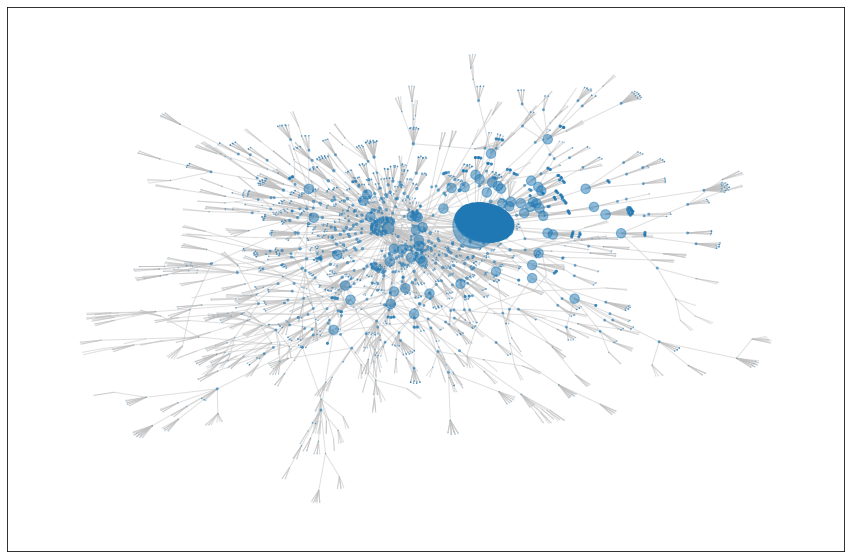

In [11]:
nodelist = list(authorities.keys())
node_size = [value * 2000 / max_authority for value in authorities.values()]

nx.draw_networkx(
    hierarchy_graph, 
    with_labels=False, 
    alpha=0.5,
    nodelist=nodelist, 
    node_size=node_size,
    edge_color="silver",
)
fig = plt.gcf()
fig.set_size_inches(15 , 10)
plt.show()

In [12]:
authorities_df = pd.DataFrame(
    [{'node': k, 'authority': v} for k, v in authorities.items()]
)

authorities_df.sort_values(by='authority', ascending=False).head(10)

,node,authority
68,3898,0.713745
17,2364,0.048166
319,2231,0.033986
103,1666,0.033337
198,600,0.033199
846,2346,0.032666
308,1062,0.032598
195,3624,0.032595
72,678,0.032536
696,1480,0.032531


In [13]:
processed_hierarchy = pd.merge(
    hierarchy, 
    authorities_df, 
    how='left', 
    left_on='category', 
    right_on='node',
).drop(columns=['node'])

processed_hierarchy.head()

,category,parent_category,level,level_2_category,authority
0,0,75,4,2364,0.000096
1,1,1499,5,2723,0.000003
2,2,1082,4,2231,0.000068
3,3,3498,4,2364,0.000097
4,4,1623,4,1825,0.000066


In [14]:
def get_item_categories_level_2(item_categories_string):
    if isinstance(item_categories_string, str):
        item_categories_list = eval(item_categories_string)
        level_2_categories = set()
        for category in item_categories_list:
            level_2_category = processed_hierarchy[
                processed_hierarchy['category']==category
            ]['level_2_category'].values[0]
            level_2_categories.add(level_2_category)
        return str(list(level_2_categories))

items['categories_level_2'] = items['categories'].apply(get_item_categories_level_2)
items['categories_level_2'].apply(lambda x: len(eval(x)) if isinstance(x, str) else 0).value_counts()

2     8313
1     7903
0     6788
3     4434
4     2092
5     1200
6      809
7      579
8      311
9      160
10      97
11      37
12      24
13      16
15       5
14       3
18       3
19       1
16       1
Name: categories_level_2, dtype: int64

In [15]:
item_category_matrix = items[['itemID', 'categories_level_2']]
for level_2_category in processed_hierarchy['level_2_category'].unique():
    item_category_matrix[f'category_{level_2_category}'] = item_category_matrix['categories_level_2'].apply(
        lambda x: level_2_category in eval(x) if isinstance(x, str) else False
    ) * 1

item_category_matrix.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """


(32776, 488)

In [16]:
item_category_matrix.head()

,itemID,categories_level_2,category_2364,category_2723,category_2231,category_1825,category_1840,category_2346,category_34,category_600,...,category_4290,category_4291,category_4292,category_4293,category_4294,category_4295,category_4296,category_4297,category_4298,category_4299
0,22665,"[2012, 3909, 2838, 3908]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,28640,None,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13526,"[3912, 3913, 3914, 3915, 3860, 600, 2364]",1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,21399,[2364],1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8504,[1072],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
orders['date'] = pd.to_datetime(orders['date'])

In [22]:
orders['week'] = orders['date'] - pd.to_timedelta(
    orders['date'].dt.dayofweek, 
    unit='d'
)

In [28]:
item_sales_per_week = orders.groupby(by=['week', 'itemID'])['order'].sum().reset_index()
item_sales_per_week.sample(10)

,week,itemID,order
236376,2020-12-07,28416,5
103671,2020-08-24,6014,4
68031,2020-07-20,31783,1
224178,2020-11-30,18328,2
210346,2020-11-23,2340,2
141017,2020-09-21,21377,1
155217,2020-10-05,11338,1
26597,2020-06-22,5738,2
65186,2020-07-20,19919,3
105486,2020-08-24,12616,1


In [29]:
order_categories = pd.merge(
    item_sales_per_week,
    item_category_matrix,
    how='inner',
    on='itemID'
)

order_categories.sample(5)

,week,itemID,order,categories_level_2,category_2364,category_2723,category_2231,category_1825,category_1840,category_2346,...,category_4290,category_4291,category_4292,category_4293,category_4294,category_4295,category_4296,category_4297,category_4298,category_4299
24933,2020-06-01,4503,2,"[275, 2364, 965]",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105783,2020-11-02,18880,1,"[1825, 366]",0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
29843,2020-12-21,5371,6,[2006],0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113350,2020-10-26,20110,3,"[2723, 519]",0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54719,2021-01-04,9730,15,"[3907, 4133, 4071, 3917, 3056, 1682, 4213, 421...",1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
for column in order_categories.columns:
    if column.startswith('category_'):
        order_categories[column] = order_categories[column] * order_categories['order']

order_categories.sample(5)

,week,itemID,order,categories_level_2,category_2364,category_2723,category_2231,category_1825,category_1840,category_2346,...,category_4290,category_4291,category_4292,category_4293,category_4294,category_4295,category_4296,category_4297,category_4298,category_4299
227156,2020-11-02,21536,1,"[3624, 2346]",0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
256485,2020-09-28,28657,1,"[2346, 2364]",1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
107549,2020-06-29,19188,2,"[4056, 4057, 1682, 4055]",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
230421,2020-08-31,26517,1,"[3616, 366]",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
282741,2020-11-16,20193,1,"[1072, 2793]",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
order_categories.sample(10)

,week,itemID,order,categories_level_2,category_2364,category_2723,category_2231,category_1825,category_1840,category_2346,...,category_4290,category_4291,category_4292,category_4293,category_4294,category_4295,category_4296,category_4297,category_4298,category_4299
14178,2020-06-15,2667,4,[2346],0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
21924,2020-09-07,4033,3,[3189],0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113507,2020-08-10,20131,110,"[3936, 1763, 3624, 2793, 2762, 621, 1682, 4114...",0,0,110,0,0,0,...,0,0,0,0,0,0,0,0,0,0
269843,2020-07-13,32226,2,"[2346, 3916]",0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
218621,2021-01-04,7052,10,[2920],0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
289325,2020-09-14,25292,2,"[252, 519]",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
245899,2020-08-24,27713,1,None,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
188805,2021-01-11,3730,1,"[3288, 875]",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108187,2020-10-12,19313,3,"[2346, 2364, 2006]",3,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
28763,2020-07-20,5179,2,None,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
order_categories = order_categories.drop(columns=['itemID', 'order', 'categories_level_2']).groupby('week').sum()

order_categories

,category_2364,category_2723,category_2231,category_1825,category_1840,category_2346,category_34,category_600,category_678,category_432,...,category_4290,category_4291,category_4292,category_4293,category_4294,category_4295,category_4296,category_4297,category_4298,category_4299
week,,,,,,,,,,,,,,,,,,,,,
2020-06-01,16921,2143,10585,1309,5168,4779,1501,928,1174,515,...,14,0,0,0,0,0,0,0,0,0
2020-06-08,11507,1317,7400,959,3415,3228,986,550,762,277,...,4,0,0,0,0,0,1,0,0,0
2020-06-15,13834,1599,9393,1233,4201,3962,1259,663,969,305,...,11,0,0,0,0,0,0,0,0,0
2020-06-22,14845,1776,9605,1404,4466,4548,1286,712,940,385,...,20,0,0,1,0,0,1,0,1,0
2020-06-29,16475,1855,10581,1543,5173,5269,1478,808,955,333,...,23,0,1,1,0,0,0,0,1,0
2020-07-06,15603,1823,9870,1459,4890,5036,1441,842,931,388,...,14,0,1,1,0,0,0,0,1,0
2020-07-13,13325,1518,8746,1536,4398,4478,1291,603,802,708,...,7,0,0,2,0,0,0,0,2,0
2020-07-20,11778,1470,7674,1157,3878,3882,1087,576,689,347,...,9,0,1,3,0,0,0,0,3,0
2020-07-27,12470,1482,8297,1507,3982,4189,1173,722,808,406,...,7,0,0,1,0,0,0,0,1,0


In [36]:
# !pip install hana_ml
# from hana_ml.algorithms.pal.tsa.seasonal_decompose import seasonal_decompose

     |████████████████████████████████| 5.0 MB 10.4 MB/s 
     |████████████████████████████████| 11.7 MB 35.3 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=468603ea1b233997dd3294e6e3c5ddb4b307a74f30dd0cbb885f361ea095c705
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
Successfully built htmlmin
